In this notebook, we're going to cover some of the most fundamental concepts of tensors using Tensorflow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & Numpy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try for yourself!

# Introduction to Tensors

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
# Create tensors with tf.contanst()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of our vector
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7 ],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3.,2.],
                              [8.,9.]], 
                             dtype=tf.float16) # specify the dtype
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# What's the number dimensions of another_matrix
another_matrix.ndim

2

In [ ]:
# Let's create a tensor
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                       
                       [[7,8,9],
                        [10,11,12]],
                      
                      [[13,14,15],
                       [16,17,18]]])

# 3-dimension / 2 rows / 3 columns
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

What we've created so far:
* Scalar:  a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of number - when n can be any number:

  *   0-dimensional tensor is a scalar
  *   1-dimensional tensor is a vector
  *   2-dimensional tensor is a matrix

## Creating tensors with `tf.Variable`

In [ ]:
# Create the same tensor with tf.Variable().
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try change one of the elements in our changeable tensor
changeable_tensor[0].assign(7)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Let's try change our unchangeable tensor
# unchangeable_tensor[0].assign(1)

🔑 Note: 
Rarely in practice will you need to decide whether to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does this for you. However, if in doubt, use `tf.constant` and change it later if needed.

## Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

In [ ]:
# Create random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for repoducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2= random_2.normal(shape=(3,2))

# Are they equal?
random_1, random_2 , random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])

# Shuffle our non_shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [ ]:
# Shuffle our non_shuffled tensor
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

⚙️ **Exercise:** Read through TensorFlow documentation on random seed generation:
- https://www.tensorflow.org/api_docs/python/tf/random/set_seed

and practice writing 5 random tensors and shuffle them.

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:
> Rule 4: "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

In [ ]:
# Shuffle our non_shuffled tensor
tf.random.set_seed(42) 
tf.random.shuffle(not_shuffled, seed = 1 )

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

### Other ways to create tensors

In [ ]:
# Create a tensor of all one
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# Create a tensor of all zeros
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn Numpt arrays into tensors

The main difference between Numpy arrays and TensorFlow tensors is `that tensors can be run on a GPU computing`

In [ ]:
# You can also turn Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1,25, dtype= np.int32) # create a Numpy array between 1 and 25
numpy_A
# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [ ]:
A = tf.constant(numpy_A,shape=(2,3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [ ]:
A = tf.constant(numpy_A,shape=(3,8))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [ ]:
A.ndim

2

### Getting information from tensors

When dealing with tensors you probably want to be aware of the following attributes:

* Shape
* Rank
* Axis or Dimension
* Size

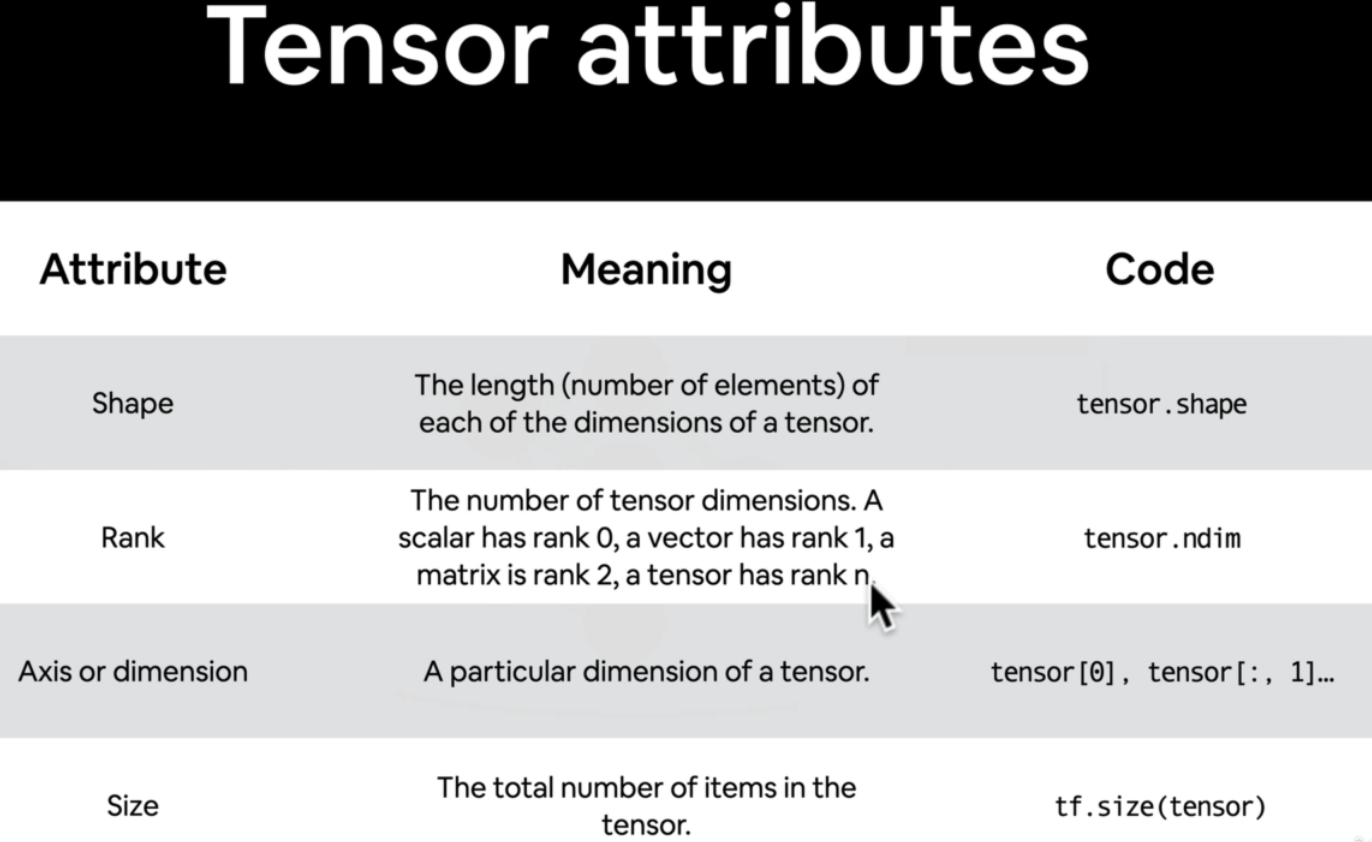

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various attributes of our tensor
print(f"Datatype of every element: {rank_4_tensor.dtype}")
print(f"Number of dimensions (rank): {rank_4_tensor.ndim}")
print(f"Shape of tensor:{rank_4_tensor.shape}")
print(f"Elements along the 0 axis: {rank_4_tensor.shape[0]}")
print(f"Elements along the last axis: {rank_4_tensor.shape[-1]}")
print(f"Total number of elements in our tensor: {tf.size(rank_4_tensor)}")
print(f"Total number of elements in our tensor: {tf.size(rank_4_tensor).numpy()}")

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor:(2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: 120
Total number of elements in our tensor: 120


### Indexing tensors

Tensors can be indexed just like Python lists

In [ ]:
some_list = [1,2,3,4]
some_list[:2]

[1, 2]

In [ ]:
# Get the first elements of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first element from each dimension from each index except the final one.
rank_4_tensor[:,:1,:1,:1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])

rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
some_list, some_list[-1]

([1, 2, 3, 4], 4)

In [ ]:
# Get the last item of each of row of our rank 2 tensor
rank_2_tensor[:,-1]


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Add in extra dimension to our rank 2 tensor
# rank_3_tensor = rank_2_tensor[...,tf.newaxis]
rank_3_tensor = rank_2_tensor[:,:,tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [ ]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [ ]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

## Manipulating tensors (tensor operations)

**Basic Operations**

In [ ]:
# You can add values to a tensor using the addition operator